In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os 


In [3]:

class EpipolarGeometry: 
    def __init__(self,showImages): 
        # Load Images 
        root = os.getcwd()
        imgLeftPath = os.path.join(root,'image_1.jpeg')
        imgRightPath = os.path.join(root,'image_2.jpeg')
        self.imgLeft = cv.imread(imgLeftPath,cv.IMREAD_GRAYSCALE) 
        self.imgRight = cv.imread(imgRightPath,cv.IMREAD_GRAYSCALE) 

        if showImages: 
            plt.figure() 
            plt.subplot(121)
            plt.imshow(self.imgLeft)
            plt.subplot(122)
            plt.imshow(self.imgRight)
            plt.show() 

    def drawStereoEpilines(self):  
        # Feature Matching 
        sift = cv.SIFT_create()
        kpLeft,desLeft = sift.detectAndCompute(self.imgLeft,None)
        kpRight,desRight = sift.detectAndCompute(self.imgRight,None)
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv.FlannBasedMatcher(index_params,search_params)
        matches = flann.knnMatch(desLeft,desRight,k=2)
        ptsLeft = []
        ptsRight = []
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.8*n.distance:
                ptsRight.append(kpRight[m.trainIdx].pt)
                ptsLeft.append(kpLeft[m.queryIdx].pt)

        # Calc fundamental matrix 
        ptsLeft = np.int32(ptsLeft)
        ptsRight = np.int32(ptsRight)
        F,mask = cv.findFundamentalMat(ptsLeft,ptsRight,cv.FM_LMEDS)

        # Extract points 
        ptsLeft = ptsLeft[mask.ravel()==1]
        ptsRight = ptsRight[mask.ravel()==1]
        step = 10 
        ptsLeft = ptsLeft[::step,:]
        ptsRight = ptsRight[::step,:]

        # Draw epilines on left and right images 
        linesLeft = cv.computeCorrespondEpilines(ptsRight.reshape(-1,1,2),2,F)
        linesLeft = linesLeft.reshape(-1,3)
        imgLeftLines,_ = EpipolarGeometry.drawLines(self.imgLeft,self.imgRight,linesLeft,ptsLeft,ptsRight)
        linesRight = cv.computeCorrespondEpilines(ptsLeft.reshape(-1,1,2),1,F)
        linesRight = linesRight.reshape(-1,3)
        imgRightLines,_ = EpipolarGeometry.drawLines(self.imgRight,self.imgLeft,linesRight,ptsRight,ptsLeft)
        plt.subplot(121)
        plt.imshow(imgLeftLines)
        plt.subplot(122)
        plt.imshow(imgRightLines)
        plt.show()

    @staticmethod
    def drawLines(imgLeft,imgRight,lines,ptsLeft,ptsRight):
        r,c = imgLeft.shape
        imgLeft = cv.cvtColor(imgLeft,cv.COLOR_GRAY2BGR)
        imgRight = cv.cvtColor(imgRight,cv.COLOR_GRAY2BGR)
        for r,pt1,pt2 in zip(lines,ptsLeft,ptsRight):
            color = tuple(np.random.randint(0,255,3).tolist())
            x0,y0 = map(int,[0,-r[2]/r[1]])
            x1,y1 = map(int,[c,-(r[2]+r[0]*c)/r[1]])
            imgLeft = cv.line(imgLeft,(x0,y0),(x1,y1),color,1)
            imgLeft = cv.circle(imgLeft,tuple(pt1),5,color,-1)
            imgRight = cv.circle(imgRight,tuple(pt2),5,color,-1)
        return imgLeft,imgRight
    
def demoViewPics(): 
    # See pictures 
    eg = EpipolarGeometry(showImages=True)

def demoDrawEpilines(): 
    # Draw epilines 
    eg = EpipolarGeometry(showImages=False)
    eg.drawStereoEpilines() 

In [ ]:
demoDrawEpilines() 

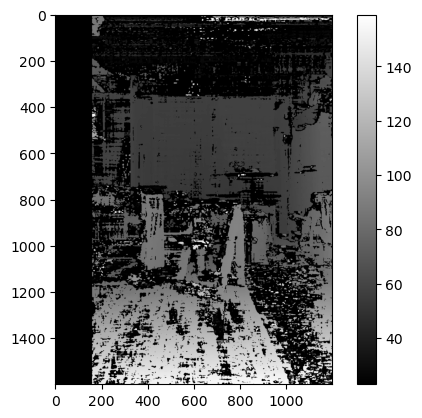

In [223]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os 

class DepthMap: 
    def __init__(self,showImages): 
        # Load Images 
        root = os.getcwd()
        imgLeftPath = os.path.join(root,'chair_l.jpeg')
        imgRightPath = os.path.join(root,'chair_r.jpeg')
        self.imgLeft = cv.imread(imgLeftPath,cv.IMREAD_GRAYSCALE) 
        self.imgRight = cv.imread(imgRightPath,cv.IMREAD_GRAYSCALE) 

        if showImages: 
            plt.figure() 
            plt.subplot(121)
            plt.imshow(self.imgLeft)
            plt.subplot(122)
            plt.imshow(self.imgRight)
            plt.show() 

    def computeDepthMapBM(self):
        nDispFactor = 16 
        stereo = cv.StereoBM.create(numDisparities=16*nDispFactor, blockSize=55)
        disparity = stereo.compute(self.imgLeft,self.imgRight)
        plt.imshow(disparity,'gray')
        plt.show()

    def computeDepthMapSGBM(self): 
        window_size = 6
        min_disp = 24
        nDispFactor = 10
        num_disp = 16*nDispFactor-min_disp

        stereo = cv.StereoSGBM_create(minDisparity=min_disp, numDisparities=num_disp, blockSize=window_size, P1=8*3*window_size**2,P2=32*3*window_size**2,disp12MaxDiff=1,uniquenessRatio=21,speckleWindowSize=10,speckleRange=30,preFilterCap=63,mode=cv.STEREO_SGBM_MODE_SGBM_3WAY)

        # Compute disparity map
        disparity = stereo.compute(self.imgLeft,self.imgRight).astype(np.float32) / 16.0

        # Display the disparity map
        plt.imshow(disparity, 'gray')
        plt.colorbar()
        plt.show()

def demoViewPics():
    # See pictures 
    dp = DepthMap(showImages=True) 

def demoStereoBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapBM()

def demoStereoSGBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapSGBM()
demoStereoSGBM() 

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

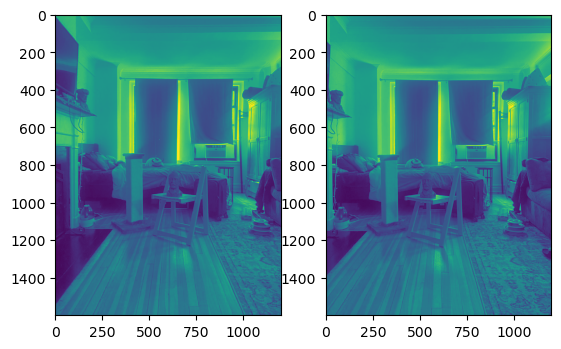

In [232]:
ILeft = cv.imread('chair_l.jpeg',cv.IMREAD_GRAYSCALE) 
IRight = cv.imread('chair_r.jpeg',cv.IMREAD_GRAYSCALE) 

plt.figure() 
plt.subplot(121)
plt.imshow(ILeft)
plt.subplot(122)
plt.imshow(IRight)
plt.show() 

In [233]:
def drawLines(imgLeft, imgRight, lines, points_l, points_r):
    r, c = imgLeft.shape
    imgLeft = cv.cvtColor(imgLeft, cv.COLOR_GRAY2BGR)
    imgRight = cv.cvtColor(imgRight, cv.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, points_l, points_r):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        imgLeft = cv.line(imgLeft, (x0, y0), (x1, y1), color, 3)
        imgLeft = cv.circle(imgLeft, tuple(pt1), 10, color, -1)  
        imgRight = cv.circle(imgRight, tuple(pt2), 10, color, -1)
    return imgLeft, imgRight

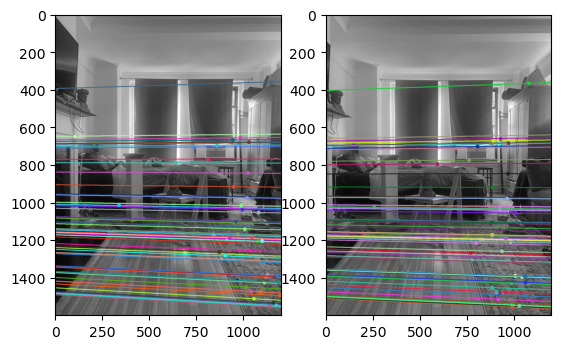

In [236]:
sift = cv.SIFT_create()
keypointsLeft,desLeft = sift.detectAndCompute(ILeft,None)
keypointsRight,desRight = sift.detectAndCompute(IRight,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(desLeft,desRight,k=2)

points_Left = []
points_Right = []
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        points_Right.append(keypointsRight[m.trainIdx].pt)
        points_Left.append(keypointsLeft[m.queryIdx].pt)

# Calculate fundamental matrix 
points_Left = np.int32(points_Left)
points_Right = np.int32(points_Right)
F,mask = cv.findFundamentalMat(points_Left,points_Right,cv.FM_LMEDS)

# Extract points 
points_Left = points_Left[mask.ravel()==1]
points_Right = points_Right[mask.ravel()==1]
step = 20 
points_Left = points_Left[::step,:]
points_Right = points_Right[::step,:]

# Draw epilines on left and right images 
linesLeft = cv.computeCorrespondEpilines(points_Right.reshape(-1,1,2),2,F)
linesLeft = linesLeft.reshape(-1,3)
imgLeftLines,_ = drawLines(ILeft,IRight,linesLeft,points_Left,points_Right)
linesRight = cv.computeCorrespondEpilines(points_Left.reshape(-1,1,2),1,F)
linesRight = linesRight.reshape(-1,3)
imgRightLines,_ = drawLines(IRight,ILeft,linesRight,points_Right,points_Left)
plt.subplot(121)
plt.imshow(imgLeftLines)
plt.subplot(122)
plt.imshow(imgRightLines)
plt.show()


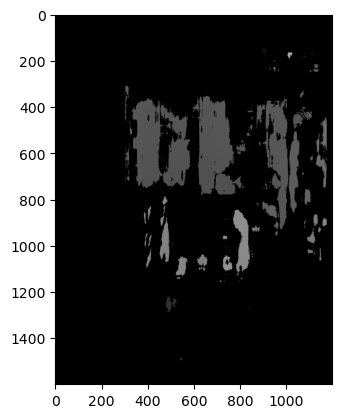

In [227]:
# Adjustable
nDispFactor = 16

# Calculated
stereo = cv.StereoBM.create(numDisparities=16*nDispFactor, blockSize=55)
disparity = stereo.compute(ILeft, IRight)


plt.imshow(disparity,'gray')
plt.show()

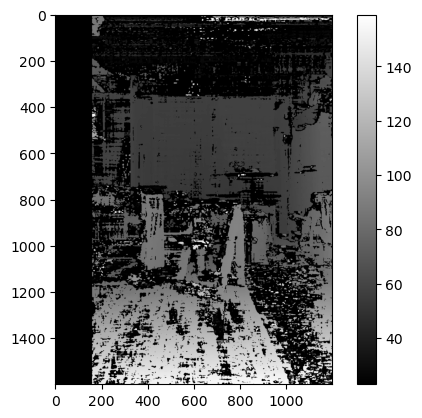

In [228]:
# Adjustable
window_size = 6
min_disp = 24
nDispFactor = 10

# Calculated
num_disp = 16*nDispFactor-min_disp
stereo = cv.StereoSGBM_create(minDisparity=min_disp, numDisparities=num_disp, blockSize=window_size, P1=8*3*window_size**2,P2=32*3*window_size**2,disp12MaxDiff=1,uniquenessRatio=21,speckleWindowSize=10,speckleRange=30,preFilterCap=63,mode=cv.STEREO_SGBM_MODE_SGBM_3WAY)
disparity = stereo.compute(ILeft, IRight).astype(np.float32) / 16.0


plt.imshow(disparity, 'gray')
plt.colorbar()
plt.show()